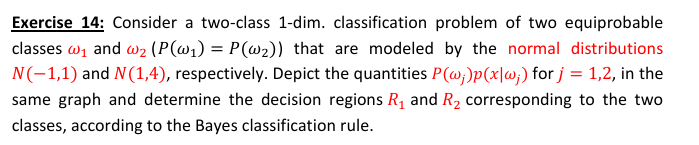

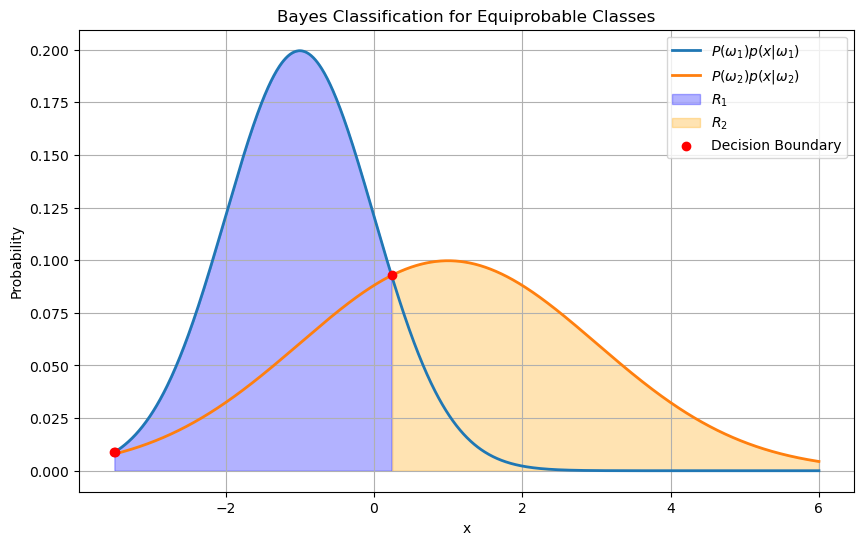

Decision boundary points: -3.50, 0.24
Region R1: x < -3.50 or x > 0.24
Region R2: -3.50 <= x <= 0.24


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters for the normal distributions
mu_w1, sigma_w1 = -1, 1  # N(-1, 1)
mu_w2, sigma_w2 = 1, 2   # N(1, 4) (std deviation is sqrt(4) = 2)

# Define the PDFs for each class
def p_x_given_w1(x):
    return norm.pdf(x, mu_w1, sigma_w1)

def p_x_given_w2(x):
    return norm.pdf(x, mu_w2, sigma_w2)

# Define the priors (equiprobable case)
P_w1 = 0.5
P_w2 = 0.5

# Generate x values
x_values = np.linspace(-3.5, 6, 1000)

# Calculate P(w_i)p(x|w_i)
P_w1_p_x_given_w1 = P_w1 * p_x_given_w1(x_values)
P_w2_p_x_given_w2 = P_w2 * p_x_given_w2(x_values)

# Find decision boundary (where P(w1)p(x|w1) = P(w2)p(x|w2))
decision_boundary = np.abs(P_w1_p_x_given_w1 - P_w2_p_x_given_w2) < 1e-3

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, P_w1_p_x_given_w1, label=r"$P(\omega_1)p(x|\omega_1)$", linewidth=2)
plt.plot(x_values, P_w2_p_x_given_w2, label=r"$P(\omega_2)p(x|\omega_2)$", linewidth=2)
plt.fill_between(x_values, 0, P_w1_p_x_given_w1, where=P_w1_p_x_given_w1 > P_w2_p_x_given_w2,
                 color='blue', alpha=0.3, label=r"$R_1$")
plt.fill_between(x_values, 0, P_w2_p_x_given_w2, where=P_w2_p_x_given_w2 > P_w1_p_x_given_w1,
                 color='orange', alpha=0.3, label=r"$R_2$")
plt.scatter(x_values[decision_boundary], P_w1_p_x_given_w1[decision_boundary], color='red', 
            label="Decision Boundary", zorder=5)
plt.title("Bayes Classification for Equiprobable Classes")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.savefig("decision_regions_ex14_corrected.png")
plt.show()

# Print decision regions
decision_points = x_values[decision_boundary]
if len(decision_points) >= 2:
    print(f"Decision boundary points: {decision_points[0]:.2f}, {decision_points[-1]:.2f}")
    print(f"Region R1: x < {decision_points[0]:.2f} or x > {decision_points[-1]:.2f}")
    print(f"Region R2: {decision_points[0]:.2f} <= x <= {decision_points[-1]:.2f}")
else:
    print("No clear decision boundaries found in this range.")
